# # Here the Data is about Mall Customers. 


### # Given Mall Customer DataSet is Here: [ Mall-Customers ](http://localhost:8888/edit/ML%20Programings/Assi%202/Mall_Customers.csv)

# ---------------------------------------------------------------------------------------------------------------

#  # --} Perform Exploratory Data Analysis (EDA)

In [1]:
import numpy as np                          # Importing Numpy important python library 
import pandas as pd                         # Importing Pandas library for EDA Purpose
import matplotlib.pyplot as plt 
import seaborn as sns                       # Importing Seaborn & Matplot for Ploting graphs
%matplotlib inline                       

In [2]:
mc = pd.read_csv('mc.csv')   # Fetching Mall Customers using Panda Library
mc                           # Represents specific rows and coloumb of dataset.

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# ---------------------------------------------------------------------------------------------------------------

### # Explore continious Features. 

In [3]:
mc.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# ---------------------------------------------------------------------------------------------------------------

### # Shape of Dataset.

In [4]:
mc.shape   # shows total number of rows and columbs of dataset.

(200, 5)

# ---------------------------------------------------------------------------------------------------------------

### # In order To Understand Data Types of Entire Data.

In [5]:
mc.info()  # Inorder to check Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# ---------------------------------------------------------------------------------------------------------------

### # Null Data Check in database.

In [6]:
mc.isnull().sum()     # Inorder to check missing value in dataset.

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

##### ---> Here the Data set has no NULL Data.

# ---------------------------------------------------------------------------------------------------------------

### # Duplicate Data Check in database.

In [7]:
mc.duplicated().sum() # Procvides total number of duplicate data in dataset. 

0

##### ---> Here the Data set has zero Duplicate Data.

# ---------------------------------------------------------------------------------------------------------------

## ---} Outliers check and Handling.

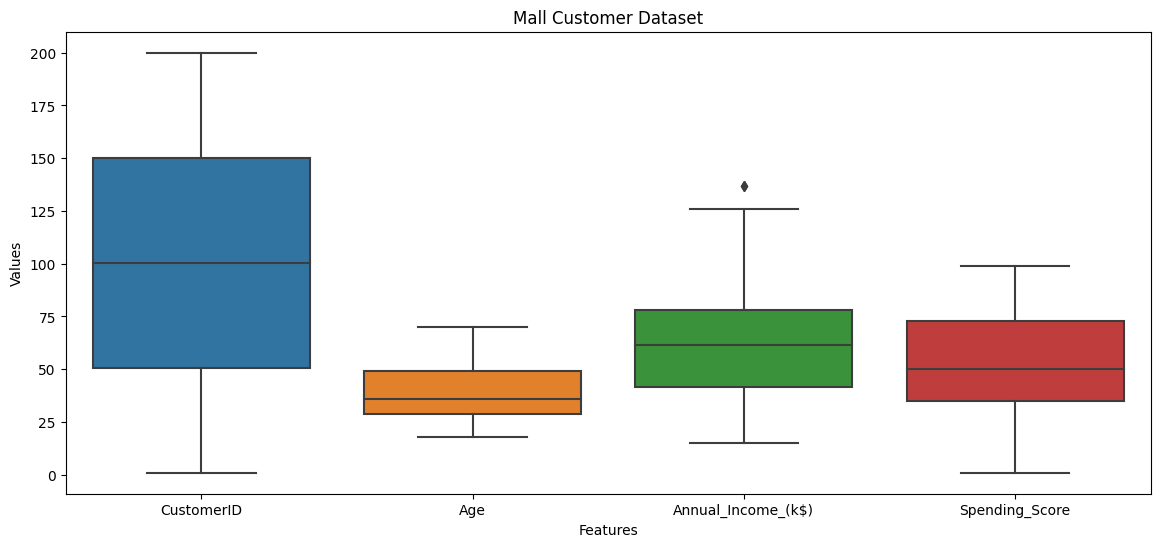

In [8]:
# Create a box plot of all features using Seaborn.

plt.figure(figsize = (14,6))          # Sets plot size.

sns.boxplot(data=mc)

# Title of Dataset. 
plt.title('Mall Customer Dataset')

plt.xlabel('Features')
plt.ylabel('Values')

# Display the plot.
plt.show()


### ---} Thus, it can be seen that Outliers in Mall Customer DataSet is not Present. 

# ---------------------------------------------------------------------------------------------------------------

# # 1.1 ---} Perform k-means clustering over this dataset using Manhattan distance as the distance-measure. (10 Points)

In [9]:
import sys

givenDec = lambda gdVal: float('%.1f' % gdVal) 

# Inorder to Represent data into Matrix Structured form.

def PrintDistMatrix(gDistMat):
    for i in range(len(gDistMat)):
        for j in range(len(gDistMat[0])):
            sys.stdout.write(str(givenDec(gDistMat[i][j])) + '\t')
        sys.stdout.write('\n')

## # Converting Data from Categorical to Numerical Form .

In [10]:
mc      # Mall Customers dataset.

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
mc["Genre"] = mc["Genre"].astype("category").cat.codes  # converting catgorical columb genre of male & female into numerical form.

mc.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# ---------------------------------------------------------------------------------------------------------------

## # Converting DataFrame Into Matrix Form.

In [12]:
matrix = mc.values # convert dataframe into matrix.
matrix

array([[  1,   1,  19,  15,  39],
       [  2,   1,  21,  15,  81],
       [  3,   0,  20,  16,   6],
       [  4,   0,  23,  16,  77],
       [  5,   0,  31,  17,  40],
       [  6,   0,  22,  17,  76],
       [  7,   0,  35,  18,   6],
       [  8,   0,  23,  18,  94],
       [  9,   1,  64,  19,   3],
       [ 10,   0,  30,  19,  72],
       [ 11,   1,  67,  19,  14],
       [ 12,   0,  35,  19,  99],
       [ 13,   0,  58,  20,  15],
       [ 14,   0,  24,  20,  77],
       [ 15,   1,  37,  20,  13],
       [ 16,   1,  22,  20,  79],
       [ 17,   0,  35,  21,  35],
       [ 18,   1,  20,  21,  66],
       [ 19,   1,  52,  23,  29],
       [ 20,   0,  35,  23,  98],
       [ 21,   1,  35,  24,  35],
       [ 22,   1,  25,  24,  73],
       [ 23,   0,  46,  25,   5],
       [ 24,   1,  31,  25,  73],
       [ 25,   0,  54,  28,  14],
       [ 26,   1,  29,  28,  82],
       [ 27,   0,  45,  28,  32],
       [ 28,   1,  35,  28,  61],
       [ 29,   0,  40,  29,  31],
       [ 30,  

In [13]:
# Importing Manhattan Distance measure.
from sklearn.metrics.pairwise import manhattan_distances

dist_matrix = manhattan_distances(matrix)
PrintDistMatrix(dist_matrix)

0.0	45.0	38.0	47.0	20.0	48.0	59.0	70.0	93.0	58.0	87.0	92.0	81.0	62.0	63.0	63.0	43.0	51.0	69.0	103.0	49.0	70.0	94.0	79.0	98.0	91.0	73.0	78.0	72.0	96.0	121.0	83.0	119.0	105.0	108.0	98.0	101.0	102.0	91.0	99.0	114.0	122.0	98.0	102.0	110.0	101.0	119.0	89.0	87.0	90.0	121.0	113.0	108.0	142.0	120.0	113.0	129.0	143.0	110.0	131.0	159.0	108.0	156.0	151.0	153.0	119.0	135.0	159.0	121.0	124.0	171.0	137.0	159.0	167.0	161.0	136.0	156.0	146.0	135.0	152.0	169.0	155.0	171.0	155.0	144.0	160.0	184.0	149.0	168.0	171.0	200.0	138.0	176.0	161.0	156.0	158.0	178.0	162.0	176.0	156.0	154.0	188.0	217.0	173.0	198.0	158.0	213.0	197.0	209.0	213.0	217.0	175.0	184.0	169.0	175.0	177.0	215.0	218.0	207.0	221.0	197.0	194.0	217.0	249.0	194.0	231.0	210.0	260.0	252.0	240.0	244.0	243.0	201.0	235.0	227.0	253.0	252.0	242.0	226.0	248.0	273.0	268.0	214.0	266.0	239.0	274.0	240.0	258.0	244.0	278.0	259.0	283.0	260.0	273.0	269.0	277.0	275.0	271.0	274.0	268.0	266.0	280.0	262.0	296.0	278.0	289.0	279.0	309.0	270.0	278.0	289.0	288.0	290.0	

### ---} Here it can be observe that the value of data is varring to much and in big amount, so we will apply normalization on matrix in order to have a closer values once we applied manhattan distance measure.

# ---------------------------------------------------------------------------------------------------------------

### ---} Normalizing Data

In [14]:
# Scaling numpy array
# Here standarizing matrix to equal level of scallings, which will give use better result. In order to understande or impliment.

from sklearn.preprocessing import StandardScaler

norm_matrix = StandardScaler().fit_transform(matrix)
norm_matrix

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [15]:
# Importing Manhattan Distance measure.
from sklearn.metrics.pairwise import manhattan_distances

dist_matrix_norm = manhattan_distances(norm_matrix)
PrintDistMatrix(dist_matrix_norm)

0.0	1.8	3.4	3.9	3.1	3.8	4.7	4.7	4.9	4.4	4.7	5.8	6.1	4.3	2.7	2.2	3.8	1.6	3.4	6.1	2.0	2.5	6.0	3.0	6.4	3.3	5.1	3.0	4.9	5.2	5.4	4.6	5.0	3.4	6.4	5.1	5.9	5.5	5.2	5.0	7.0	4.0	3.8	5.4	6.3	5.1	6.6	4.7	4.6	4.8	6.6	3.7	5.4	5.7	6.5	4.1	6.8	6.0	5.2	4.9	6.5	2.9	8.3	7.6	6.0	3.2	6.6	8.3	3.2	5.7	6.8	6.7	7.9	8.2	6.0	3.9	7.2	4.7	5.6	7.1	6.1	4.9	6.4	7.1	5.8	5.3	8.4	6.0	7.1	7.7	9.4	3.4	5.8	6.9	6.4	4.2	7.7	6.4	5.7	3.9	5.9	8.1	7.8	4.7	6.4	5.9	9.5	6.5	7.4	7.4	7.5	6.4	7.3	4.1	6.3	6.3	9.2	8.9	8.5	9.0	5.3	7.5	8.4	7.6	6.9	8.6	6.2	8.0	8.3	7.1	7.6	7.2	7.1	8.6	5.9	9.2	9.6	6.8	5.8	9.1	10.8	7.8	7.5	9.6	6.3	7.8	7.1	9.2	8.7	8.0	7.6	8.4	9.6	9.9	10.0	9.6	7.9	9.4	7.7	9.3	10.0	9.7	6.6	10.3	8.2	10.2	8.0	10.8	9.4	7.5	8.2	7.8	8.1	9.0	11.2	10.4	9.6	7.6	9.9	9.2	9.8	11.0	9.2	11.0	10.0	9.5	11.6	8.3	11.1	11.7	10.4	10.8	9.3	12.5	12.3	12.1	11.9	9.9	9.8	10.6	
1.8	0.0	5.1	2.4	4.5	2.4	6.1	2.9	6.4	3.3	6.2	4.0	7.6	2.8	4.2	0.6	5.3	1.2	4.8	4.3	3.5	1.3	7.5	1.8	7.9	1.5	6.6	2.7	6.3	3.4	6.9	3.4	6.5	1.9	7.9	3.3	7.3	4.3	6.7	3.8	8.5	2.2	5.3	5.2	7.

10.0	11.5	8.9	9.1	7.1	9.1	7.6	9.6	8.8	8.2	8.5	8.9	5.7	8.7	9.0	10.9	6.2	10.5	7.1	8.5	8.0	10.2	6.3	9.7	5.3	10.1	5.2	8.8	5.5	8.6	7.6	8.1	7.4	10.9	5.3	8.2	5.6	7.2	5.5	7.8	4.3	10.2	6.2	6.4	4.3	7.0	4.7	6.0	5.6	5.5	4.5	7.9	5.8	6.4	4.0	6.1	4.1	6.5	5.7	5.7	6.8	8.4	4.4	4.0	6.0	8.5	4.3	4.2	8.4	4.9	6.5	3.6	3.5	3.7	5.1	7.3	3.9	6.1	5.4	3.1	5.0	6.4	5.3	3.4	5.6	5.3	3.1	5.3	4.6	2.9	3.6	6.9	5.0	3.2	3.9	6.8	2.9	4.5	4.6	6.9	4.3	2.7	5.4	6.6	5.0	4.4	2.8	4.1	4.7	4.7	4.8	4.9	3.0	6.5	4.6	4.6	2.1	2.7	1.9	2.5	6.1	2.6	3.1	6.4	3.6	4.4	3.8	6.4	4.0	5.7	4.5	5.6	3.0	3.9	6.4	4.7	2.6	5.8	6.2	3.5	1.7	6.5	2.6	4.2	5.5	6.8	2.9	3.5	2.3	6.0	3.9	5.5	1.6	3.0	1.5	4.3	4.8	3.6	5.0	3.4	0.0	3.8	5.9	4.2	3.1	3.3	4.0	4.4	2.2	5.3	4.5	6.1	4.9	6.2	1.7	4.4	3.6	6.1	3.9	6.5	2.5	4.8	4.6	5.1	2.4	7.5	1.9	6.6	3.2	4.8	3.5	4.5	6.6	5.3	3.5	5.4	3.5	7.7	7.3	8.6	
9.7	7.9	8.8	5.8	6.9	5.8	8.4	5.9	12.6	5.4	12.3	5.9	9.6	5.4	10.1	7.5	7.0	8.0	10.4	5.6	8.9	7.2	8.7	7.0	8.8	6.4	7.4	7.6	7.0	4.8	11.4	5.1	10.8	7.1	8.1	4.6	7.4	4.3	6.4	4.7	8.1	6.4	8.8	4.6	7.1	4.6	6

# ---------------------------------------------------------------------------------------------------------------

## # K-Mean Clustering

In [16]:
import sklearn
from sklearn.cluster import KMeans

km = sklearn.cluster.KMeans(n_clusters=3, init='random', n_init=1, verbose=0)
km.fit(matrix)
y_km = km.predict(matrix)



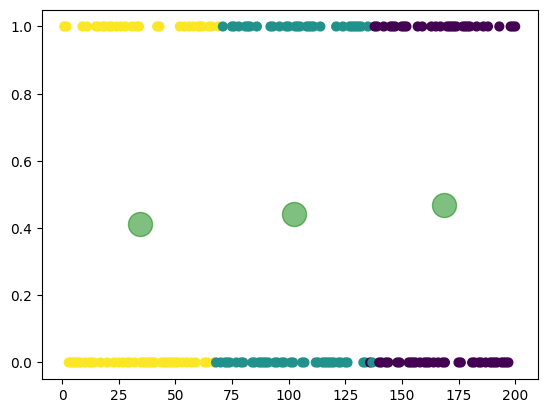

In [17]:
# Displaying Formed Clusters.

plt.scatter(matrix[:, 0], matrix[:, 1], c=y_km, s=40, cmap='viridis')
km_c = km.cluster_centers_
plt.scatter(km_c[:, 0], km_c[:, 1], c='green', s=300, alpha=0.5);

# ---------------------------------------------------------------------------------------------------------------

# # 1.2 ---} After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as ‘Labels’ and fill it with cluster number assigned by k-means algorithm. (5 Points)


In [18]:
feature = km.labels_
feature

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
# Format results as a DataFrame
# Representing clusers for each individual id's

results = pd.DataFrame([mc.index,feature]).T
results

,0,1
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
195,195,0
196,196,0
197,197,0
198,198,0


In [20]:
# Attaching cluster id's as an Column to the Dataset.

mc["labels"] = feature
mc

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,labels
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,0
197,198,1,32,126,74,0
198,199,1,32,137,18,0


# ---------------------------------------------------------------------------------------------------------------

# # 1.3 ---} Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression,decision trees, random forest, and Naive Bayes algorithm. (25 Points)


In [21]:
mc.head() # Dataset of Mall customers with clusters.

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,labels
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


# ---------------------------------------------------------------------------------------------------------------

## # ---} Logistic Regression Model.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


lr = LogisticRegression()

x =  matrix
y = mc['labels']

lr.fit(x,y)


C:\Users\iDeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
lr_pred = lr.predict(x)

lr_class = classification_report(y, lr_pred)
print(lr_class)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.97      0.94      0.96        68
           2       1.00      1.00      1.00        68

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



# ---------------------------------------------------------------------------------------------------------------

## # ---} Decision Tree Model.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

x =  matrix
y = mc['labels']

dtc.fit(x,y )

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
dtc_pred = dtc.predict(x)

dtc_class = classification_report(y, dtc_pred)
print(dtc_class )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# ---------------------------------------------------------------------------------------------------------------

## # ---} Random Forest Model.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)

x =  matrix
y = mc['labels']

rfc.fit(x,y)


RandomForestClassifier(criterion='entropy', random_state=42)

In [27]:
rfc_pred = rfc.predict(x)

rfc_class = classification_report(y, rfc_pred)
print(rfc_class)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# ---------------------------------------------------------------------------------------------------------------

## # ---} Naive Bayes Algorithm.

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


nb  = GaussianNB()

x =  matrix
y = mc['labels']

nb.fit(x,y)


GaussianNB()

In [29]:
nb_pred = nb.predict(x)

nb_class = classification_report(y, nb_pred)
print(nb_class)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        64
           1       0.98      0.94      0.96        68
           2       1.00      0.99      0.99        68

    accuracy                           0.97       200
   macro avg       0.98      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



# ---------------------------------------------------------------------------------------------------------------

# # 1.4 ---} Compare the performance of these various supervised learning algorithm and comment on the homogeneity of clusters, like is the clusters or groups are making sense or not ? (10 Points)

### ----} By observing the outcome of each algorithm it can be said that Logistic Regression Model has performed best amongs all other Algorithms, as off it has an accuracy of 97%, which sounds fair and realistic. 

### ----} Besides Naive Base Algorithm has also stood its ground, with the accuracy of 95% as good as Logistic Regression Algo.

### ----} Which clearly indicates that LR & NB Algorithms has performed really well over dataset. While Talking about Random Forest and Decission Tree Classifier they both have 100% Accuracy so its kind of feels shaddy. other than that it works perfectly.

In [30]:
mc[mc["labels"]==0] # Inorder to chek clusters data. whether it is managed well or not.

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,labels
135,136,0,29,73,88,0
137,138,1,32,73,73,0
138,139,1,19,74,10,0
139,140,0,35,74,72,0
140,141,0,57,75,5,0
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,0
197,198,1,32,126,74,0
198,199,1,32,137,18,0


In [31]:
mc[mc["labels"]==1]   # Inorder to chek clusters data. whether it is managed well or not.

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,labels
67,68,0,68,48,48,1
69,70,0,32,48,47,1
70,71,1,70,49,55,1
71,72,0,47,49,42,1
72,73,0,60,50,49,1
...,...,...,...,...,...,...
131,132,1,39,71,75,1
132,133,0,25,72,34,1
133,134,0,31,72,71,1
134,135,1,20,73,5,1


In [32]:
mc[mc["labels"]==2]    # Inorder to chek clusters data. whether it is managed well or not.

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,labels
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
63,64,0,54,47,59,2
64,65,1,63,48,51,2
65,66,1,18,48,59,2
66,67,0,43,48,50,2


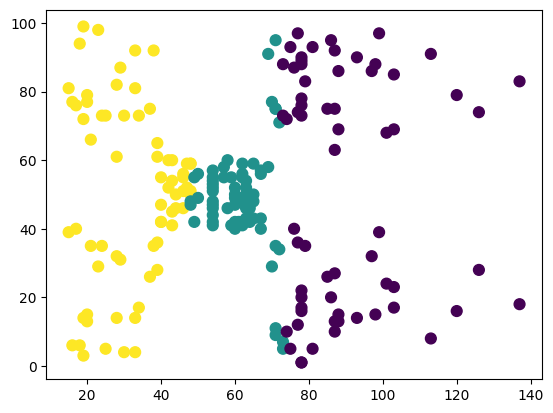

In [33]:
plt.scatter(mc["Annual_Income_(k$)"], mc["Spending_Score"], c=feature, s=60, cmap='viridis')

### ----} Scatter PLot of Annual Income Vs Spending Score. It can be seen that it is weel seperated but can't be said same for clusters. preety high and low probably. 

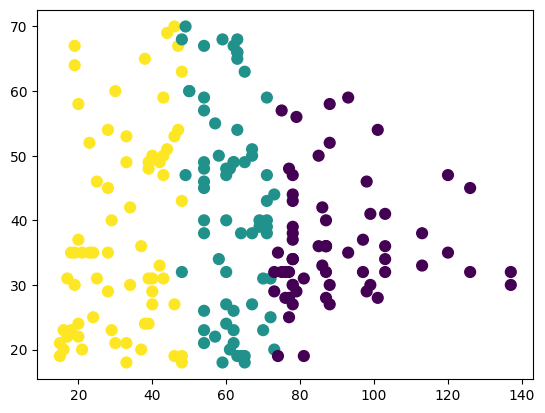

In [34]:
plt.scatter(mc["Annual_Income_(k$)"], mc["Age"], c=feature, s=60, cmap='viridis')


### ----} Scatter PLot of Annual Income Vs Age. It can be seen that it is weel seperated and kind of showwing better clusrter than above. Using this it can be helpful to nofity that a certain age group hase particular expensses over a year. 

# ---------------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------------

# # Here the Data is of Breat Cancer. 


### # Given Breast Cancer DataSet is Here: [ Breast Cancer ](http://localhost:8888/edit/ML%20Programings/Assi%202/breast_cancer.csv)

In [35]:
import numpy as np                          # Importing Numpy important python library 
import pandas as pd                         # Importing Pandas library for EDA Purpose
import matplotlib.pyplot as plt 
import seaborn as sns                       # Importing Seaborn & Matplot for Ploting graphs
%matplotlib inline                       

# ---------------------------------------------------------------------------------------------------------------

## # 2.1 ---}  Import the breast_cancer dataset from sklearn.datasets library. (5 Points)

In [36]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

# Here first load Breast Cancer Data
cancer = load_breast_cancer()

# Now converting fetched data into dataframe
bc_data= pd.DataFrame(cancer.data, columns=cancer.feature_names)
bc_data['target'] = cancer.target

# Then storing dataset into csv file
bc_data.to_csv('bc_data.csv', index=False)

In [37]:
bc = pd.read_csv('breast_cancer.csv')   # Fetching Breast Cancer using Panda Library
bc.head()    

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# ---------------------------------------------------------------------------------------------------------------

## # 2.2 ---}  Perform PCA (2 components) and LDA (1 components) over the dataset. (20 Points)

### -----} PCA ( 2 Components ).

In [38]:
from sklearn.decomposition import PCA

x = bc
y = bc.target

pca = PCA(n_components=2)
pca_train = pca.fit(x,y).transform(bc)
pca_data = pd.DataFrame(data = pca_train, columns = ['pc1', 'pc2'])
pca_data.head()

,pc1,pc2
0,1160.142744,-293.917535
1,1269.122597,15.630194
2,995.794082,39.156723
3,-407.180411,-67.380505
4,930.341382,189.340710


### -----} LDA ( 1 Components ).

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis

x = bc
y = bc.target

lda = LDA(n_components=1)
lda_train = lda.fit(x, y).transform(bc)
lda_data = pd.DataFrame(data = lda_train, columns = ['ld1'])
lda_data.head()

,ld1
0,-3.323927
1,-2.319108
2,-3.747425
3,-4.048549
4,-2.281158


# ---------------------------------------------------------------------------------------------------------------

## # 2.3 ---}  Visualise the components and see if its able to segregate the class label in breast_cancer dataset. (10 Points)

### -----} PCA ( 2 Components ).

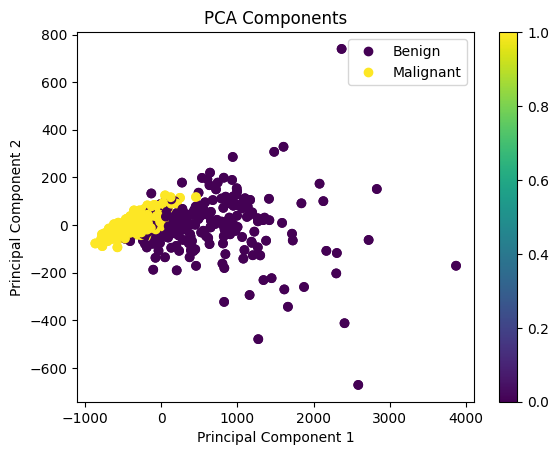

In [40]:
# Plotting PCA components using scatter plot.

y = bc.target # Target variable
plt.scatter(pca_train[:, 0], pca_train[:, 1], c = y)


plt.title('PCA Components')              # Plot Title
plt.xlabel('Principal Component 1')      # X Label for x Axis
plt.ylabel('Principal Component 2')      # Y Label for y Axis
plt.colorbar()

plt.legend(handles=plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y, ).legend_elements()[0], labels=['Benign', 'Malignant'])
plt.show()


### -----} LDA ( 1 Components ).

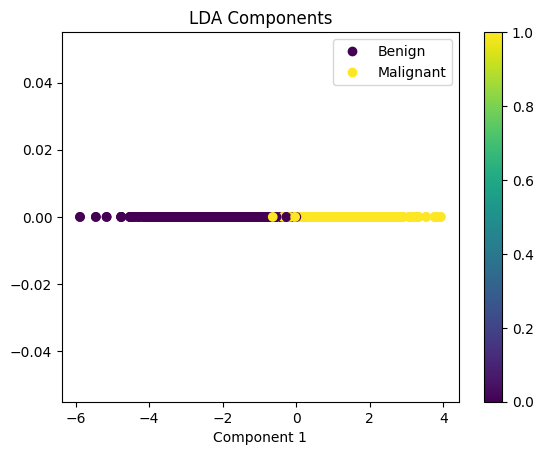

In [41]:
# Plotting LDA components using scatter plot

y = bc.target # Target variable
plt.scatter(lda_train[:, 0], np.zeros_like(lda_train), c=y) # Here np.zero will make all point at Y Interval zero.

plt.title('LDA Components')    # Plot Title
plt.xlabel('Component 1')      # X label for x axis
plt.colorbar()

plt.legend(handles=plt.scatter(lda_train[:, 0], np.zeros_like(lda_train), c=y).legend_elements()[0], labels=['Benign', 'Malignant'])
plt.show()

### -----} Here by observing both plot it can be easily said that PCA has more overlaped data so, I think LDA has better performed. I know its in one dimension kind but still it is way better than PCA .

# ---------------------------------------------------------------------------------------------------------------

## # 2.4 ---} What is the maximum variance explained by both the components in PCA and LDA. (10 Points)

### -----} PCA.

In [42]:
pca_vr = pca.explained_variance_ratio_

print(" --- PCA Variance Ratio: {}  ".format(pca_vr))

 --- PCA Variance Ratio: [0.98204444 0.01617648]  


### -----} LDA.

In [43]:
lda_vr = lda.explained_variance_ratio_

print(" --- LDA Variance Ratio: {}  ".format(lda_vr))

 --- LDA Variance Ratio: [1.]  


# ---------------------------------------------------------------------------------------------------------------

## # 2.5  ---} Comment on the working of PCA and LDA and which one is better for breast_cancer dataset. (5 Points)


### -----} Well looking at the output of maximum variance amongs PCA & LDA it can be said that both of them has done preety good work. As PCA has two component and it shows variance of arround 98%, which is preety good. 

### -----} while LDA has one component but has done better compare to PCA showing 100% variance ration with better seperation of target dataset. Hence it can be conclude that LDA has Performed better in compare to PCA.

### -----} In any condition both model has done preety good job, hence both of them should be considered as great. its just that PCA is an UNsuperwised Learning method, while LDA is an Supperwised Learning method. Both of them are effective and can be used for any appropriate dataset.